# WMT figs of $G_\Omega(\theta)$ and $\frac{d}{dt}M_\Omega(\theta)$

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
from matplotlib.colors import LogNorm

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

#era5_nodeltaT = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_nodeltaT.zarr'))
#era5_ds_regridded_sst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_glorys_sst_regridded.zarr'))

era_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_updated.zarr'))
glorys = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/dVdt.zarr'))
merra_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/hist_ds_updated.zarr'))

#open hist ds w goes sw
era_g_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_w_goesSW.zarr'))
merra_g_ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/MERRA2/datasets/hist_w_goesSW.zarr'))

In [21]:
dVdt_da = glorys.histogram_theta

In [11]:
era = era_ds.isel(time=slice(1, None))
era_g = era_g_ds.isel(time=slice(1, None))
merra = merra_ds.isel(time=slice(1, None))
merra_g = merra_g_ds.isel(time=slice(1, None))

In [12]:
dVdt = dVdt_da.sel(time=slice(None, '2023-09-28')).assign_coords({'time':era.time})

In [13]:
dVdt.time

<xarray.DataArray 'time' (time: 270)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-09-26T00:00:00.000000000',
       '2023-09-27T00:00:00.000000000', '2023-09-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-09-28

In [14]:
era.time

<xarray.DataArray 'time' (time: 270)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-09-26T00:00:00.000000000',
       '2023-09-27T00:00:00.000000000', '2023-09-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-09-28

In [15]:
merra.time

<xarray.DataArray 'time' (time: 270)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-09-26T00:00:00.000000000',
       '2023-09-27T00:00:00.000000000', '2023-09-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-09-28

<Figure size 2000x400 with 0 Axes>

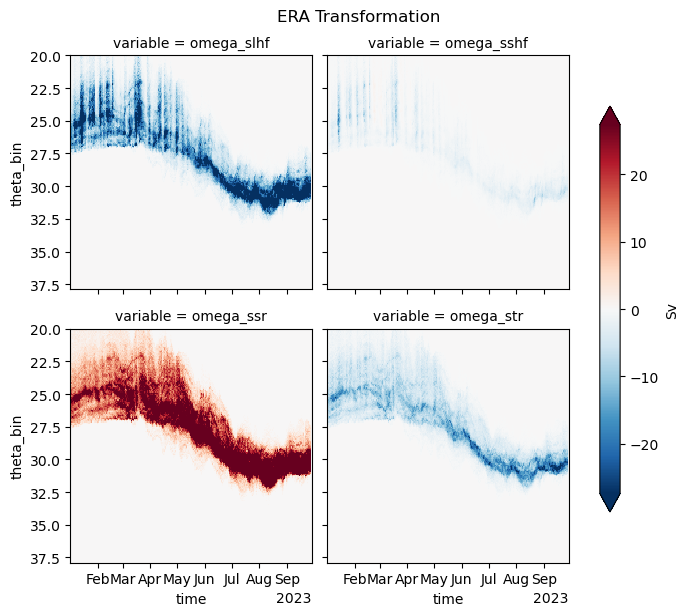

In [16]:
plt.figure(figsize=(20,4))
(era/1e6).to_array().plot(col='variable', col_wrap=2, x='time', 
                               yincrease=False, robust=True, 
                               cbar_kwargs={'shrink': 0.8, 'label':'Sv'})
plt.suptitle('ERA Transformation', y=1.02);

<Figure size 2000x400 with 0 Axes>

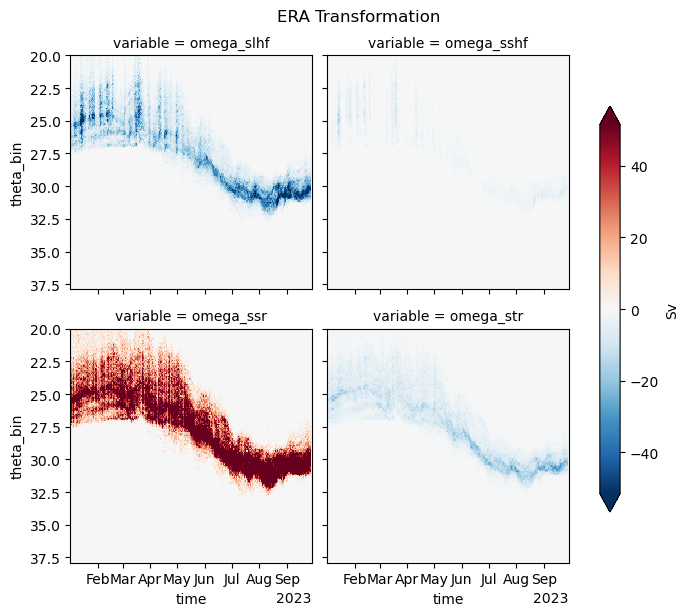

In [18]:
plt.figure(figsize=(20,4))
(era_g/1e6).to_array().plot(col='variable', col_wrap=2, x='time', 
                               yincrease=False, robust=True, 
                               cbar_kwargs={'shrink': 0.8, 'label':'Sv'})
plt.suptitle('ERA Transformation', y=1.02);

<Figure size 2000x400 with 0 Axes>

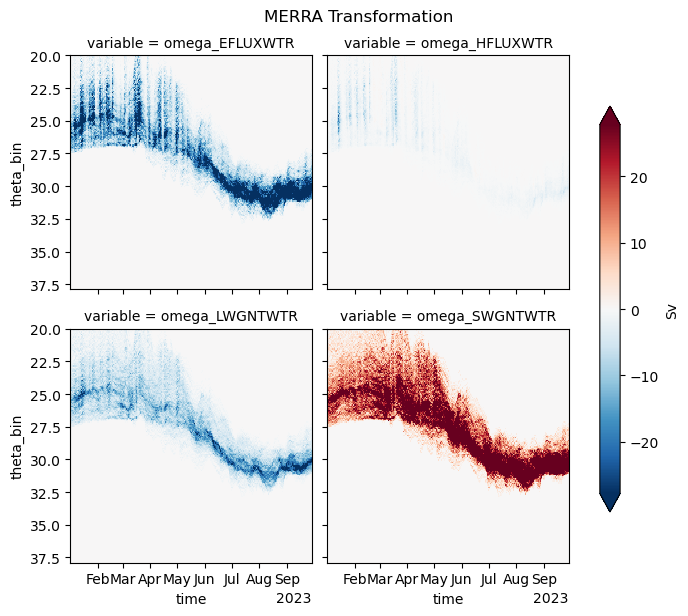

In [19]:
plt.figure(figsize=(20,4))
(merra/1e6).to_array().plot(col='variable', col_wrap=2, x='time', 
                               yincrease=False, robust=True, 
                               cbar_kwargs={'shrink': 0.8, 'label':'Sv'})
plt.suptitle('MERRA Transformation', y=1.02);

<Figure size 2000x400 with 0 Axes>

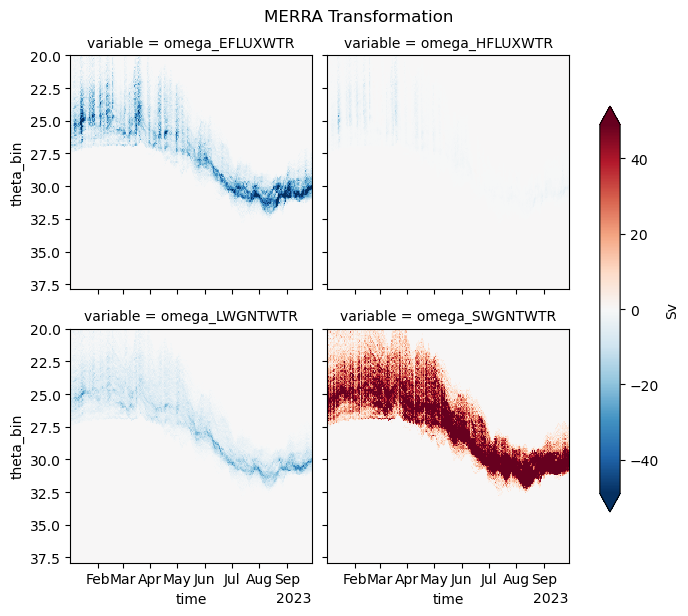

In [20]:
plt.figure(figsize=(20,4))
(merra_g/1e6).to_array().plot(col='variable', col_wrap=2, x='time', 
                               yincrease=False, robust=True, 
                               cbar_kwargs={'shrink': 0.8, 'label':'Sv'})
plt.suptitle('MERRA Transformation', y=1.02);

## Plot histograms w/ `dVdt`

In [34]:
one_plt_era = (era.sel(theta_bin=31.8, method='nearest') / 1e6)
one_plt_merra = (merra.sel(theta_bin=31.8, method='nearest') / 1e6)

one_plt_era_g = (era_g.sel(theta_bin=31.8, method='nearest') / 1e6)
one_plt_merra_g = (merra_g.sel(theta_bin=31.8, method='nearest') / 1e6)

dVdt_s = dVdt/1e6

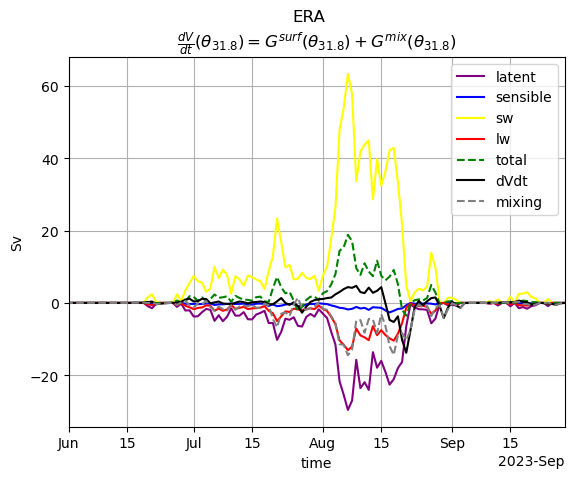

In [43]:
one_plt_era.omega_slhf.plot(label='latent', color='purple')
one_plt_era.omega_sshf.plot(label='sensible', color='blue')
one_plt_era.omega_ssr.plot(label='sw', color='yellow')
one_plt_era.omega_str.plot(label='lw', color='red')
one_plt_era.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_era.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-01', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_era.time.sel(**t1), one_plt_era.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('ERA');

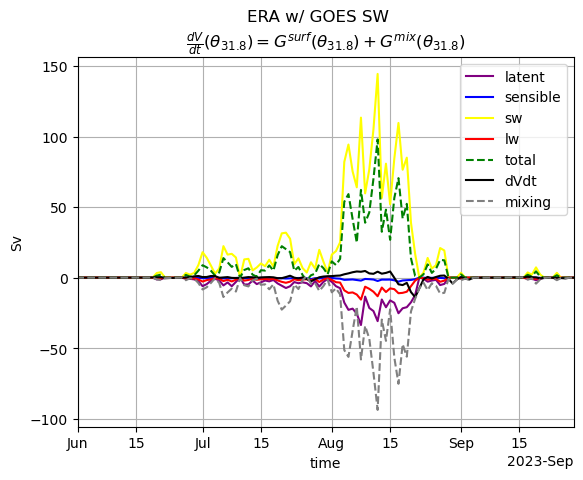

In [42]:
one_plt_era_g.omega_slhf.plot(label='latent', color='purple')
one_plt_era_g.omega_sshf.plot(label='sensible', color='blue')
one_plt_era_g.omega_ssr.plot(label='sw', color='yellow')
one_plt_era_g.omega_str.plot(label='lw', color='red')
one_plt_era_g.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_era_g.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-01', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_era.time.sel(**t1), one_plt_era.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('ERA w/ GOES SW');

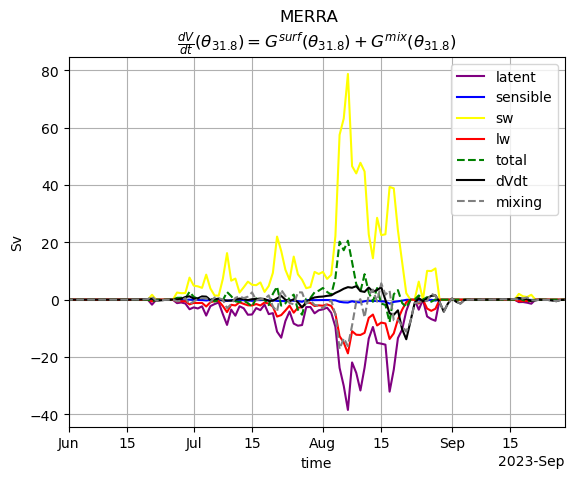

In [44]:
one_plt_merra.omega_EFLUXWTR.plot(label='latent', color='purple')
one_plt_merra.omega_HFLUXWTR.plot(label='sensible', color='blue')
one_plt_merra.omega_SWGNTWTR.plot(label='sw', color='yellow')
one_plt_merra.omega_LWGNTWTR.plot(label='lw', color='red')
one_plt_merra.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_merra.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-01', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_merra.time.sel(**t1), one_plt_merra.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('MERRA');

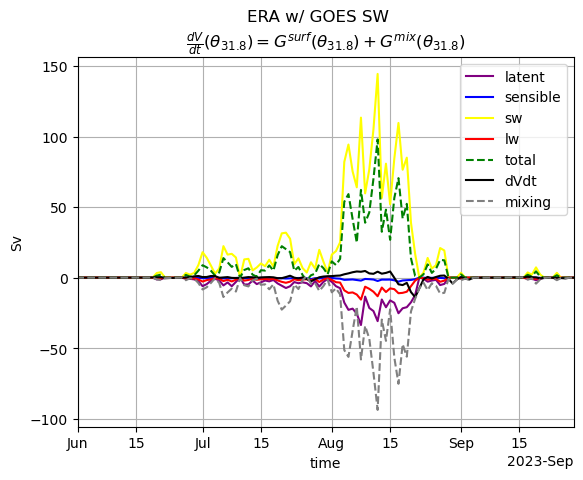

In [42]:
one_plt_merra_g.omega_EFLUXWTR.plot(label='latent', color='purple')
one_plt_merra_g.omega_HFLUXWTR.plot(label='sensible', color='blue')
one_plt_merra_g.omega_SWGNTWTR.plot(label='sw', color='yellow')
one_plt_merra_g.omega_LWGNTWTR.plot(label='lw', color='red')
one_plt_merra_g.to_array().sum('variable').plot(label='total', color='green', linestyle='dashed')
dVdt_s.plot(label='dVdt', color='k')
(dVdt_s - one_plt_era_g.to_array().sum('variable')).plot(label='mixing', color='grey', linestyle='dashed')
plt.legend()
plt.ylabel('Sv')
plt.grid()
t1 = dict(time='2023-06-01', method='nearest')
t2 = dict(time='2023-10-01', method='nearest')
plt.xlim(one_plt_era.time.sel(**t1), one_plt_era.time.sel(**t2))
plt.title(r'$\frac{dV}{dt}(\theta_{31.8}) = G^{surf}(\theta_{31.8}) + G^{mix}(\theta_{31.8})$')
plt.suptitle('ERA w/ GOES SW');

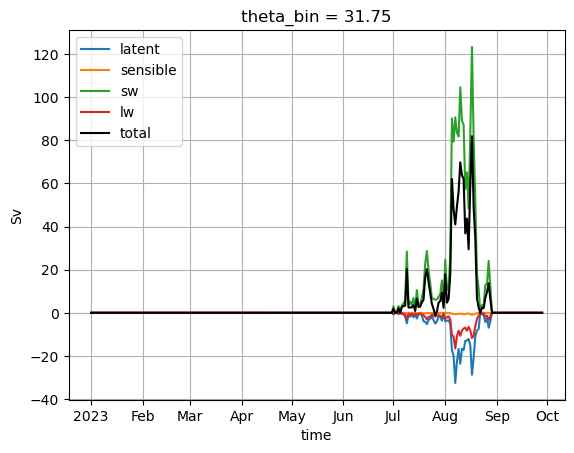

In [114]:
(one_plt_merra.omega_EFLUXWTR/1e6).plot(label='latent')
(one_plt_merra.omega_HFLUXWTR/1e6).plot(label='sensible')
(one_plt_merra.omega_SWGNTWTR/1e6).plot(label='sw')
(one_plt_merra.omega_LWGNTWTR/1e6).plot(label='lw')
(one_plt_merra/1e6).to_array().sum('variable').plot(label='total', color='k')
plt.legend()
plt.ylabel('Sv')
plt.grid();